In [21]:
#for local
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [27]:
%load_ext autoreload
%autoreload 2
import cProfile
from datetime import datetime
import importlib
import numpy as np
import logging
import os
import shutil
import yaml
from rdkit import RDLogger
from generator import MCTS
from language import Language
from node import MolSentenceNode
from utils import add_sep, class_from_package, make_logger

RDLogger.DisableLog('rdApp.*') # invalid mols are already logged

def execute_yaml(yaml_path: str) -> MCTS:
    with open(os.path.join(repo_root, yaml_path)) as f:
        conf = yaml.safe_load(f)

    output_dir=os.path.join(repo_root, "sandbox", conf["output_dir"], datetime.now().strftime("%m-%d_%H-%M")) + os.sep
    logger = make_logger(output_dir, file_level=logging.DEBUG)

    transition_conf = conf.get("transition_conf", {})
    if "model_dir" in transition_conf:
        transition_conf["model_dir"] = os.path.join(repo_root, transition_conf["model_dir"])
    lang_path = conf.get("lang_path")
    if lang_path is None:
        lang_name = os.path.basename(os.path.normpath(transition_conf["model_dir"])) + ".lang"
        lang_path = add_sep(transition_conf["model_dir"]) + lang_name
    lang = Language.load(lang_path, device=conf.get("device"))
    transition_class = class_from_package("transition", conf["transition_class"])
    transition = transition_class(lang=lang, logger=logger, **transition_conf)

    reward_class = class_from_package("reward", conf.get("reward_class"))
    reward = reward_class(**conf.get("reward_conf", {}))
    policy_class = class_from_package("policy", conf.get("policy_class"))
    policy = policy_class(**conf.get("policy_conf", {}))

    filter_settings = conf.get("filters", [])
    filters = []
    for s in filter_settings:
        filter_class = class_from_package("filter", s.pop("filter_class"))
        filters.append(filter_class(**s))
        
    root = MolSentenceNode.bos_node(lang) # TODO: change after root node generalization
    generator = MCTS(root=root, transition=transition, reward=reward, policy=policy, filters=filters, filtered_reward=conf.get("filtered_reward"), output_dir=output_dir, logger=logger, **conf.get("generator_conf", {}))

    src = os.path.join(repo_root, yaml_path)
    dst = os.path.join(output_dir, "setting.yaml")
    shutil.copy(src, dst)

    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    # cProfile.run("generator.generate(root=root, **generation_conf)"")
    generator.plot(**conf.get("plot_conf", {}))
    generator.analyze()
    
    return generator, conf

def queue_yaml(*args: str):
    for yaml_path in args:
        execute_yaml(yaml_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Is CUDA available: True
Starting generation...
1- time: 0.00, reward: -0.7286226672263674, node: PEPTIDE1{T.A.R.E.R.R.R.K.K.R.V}$$$$
2- time: 0.00, reward: -0.46053492978686683, node: PEPTIDE1{Y.V.P.T.N.V.G.S.E.A.F}$$$$
3- time: 0.25, reward: -0.1947117817390093, node: PEPTIDE1{V.E.V.P.P.V.N}$$$$
4- time: 0.25, reward: 0.075304170808516, node: PEPTIDE1{R.[dW].[dF].I.[dF].H.K.Y.[am]}$$$$
5- time: 0.25, reward: -0.30723560576402925, node: PEPTIDE1{[ac].I.W.T.T.S.M.E.L.I.K.K.L.K.A.Y.L.I.L.I.E.E.E.E.K.K.L.E.E.W.A.K.K.W.N.W.F.[am]}$$$$
6- time: 0.50, reward: 0.0008499997952927924, node: PEPTIDE1{Y.M.F.H.L.M.S}$$$$
7- time: 0.50, reward: 0.02920169527565123, node: PEPTIDE1{Y.I.C}$$$$
8- time: 0.61, reward: -0.8560516250266234, node: PEPTIDE1{G.L.Q.G.R.L.Q.R.L.L.Q.A.S.G.N.H.A.A.G.I.L.T.M}$$$$
9- time: 0.61, reward: -0.15420301787358454, node: PEPTIDE1{G.F.L.L.Q.R.F.[am]}$$$$
10- time: 0.91, reward: 0.03286815632699911, node: PEPTIDE1{F.E.L.L.P.Y.G.W.A.W.D.E.A}$$$$
11- time: 1.13, reward: -0.7

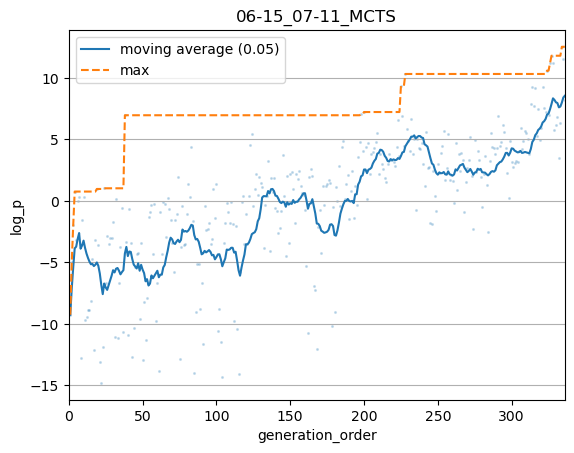

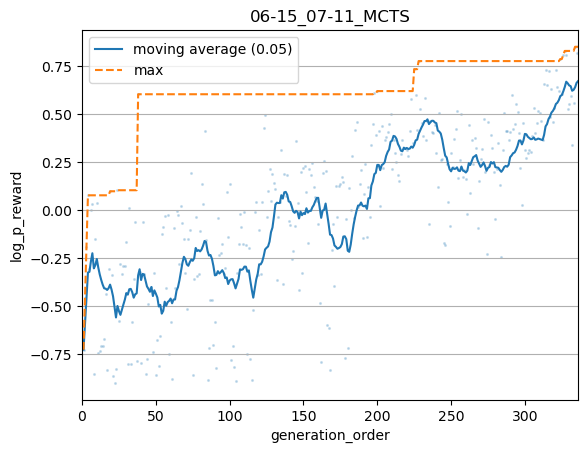

number of generated nodes: 336
valid rate: 0.6040688575899844
unique rate: 0.9217527386541471
node_per_sec: 11.196087881756647


In [28]:
c1 = "config/mcts_d_score_replication.yaml"
c2 = "config/mcts_helm.yaml"
generator, conf = execute_yaml(c2)
# queue_yaml(c1, c2)

Starting generation...
110- time: 10.23, reward: 0.9453070090614787, node: PEPTIDE1{[dA].K.R}$$$$
111- time: 10.23, reward: -0.8023843949005633, node: PEPTIDE1{[dA].K.Y.[dA].P.[dA].V.[dL].[dL]}$$$$
112- time: 10.36, reward: -0.9505426568797075, node: PEPTIDE1{[dA].D.G.F.T.G.A.Y.S.Y.S.I.R.K.K.Q.L.S.A.K.K.K.Y.L.Q.L.G.K.L.V.K.N.V.F.[am]}$$$$
113- time: 10.36, reward: -0.7383612003206017, node: PEPTIDE1{[dA].D.[dW].V.Y.[dF].P}$$$$
114- time: 10.65, reward: -0.8286482735447641, node: PEPTIDE1{[dA].W.[Nle].K.F.V.R.W.K.[dK].[am]}$$$$
115- time: 10.65, reward: -0.6506889463775598, node: PEPTIDE1{[dA].W.D}$$$$
116- time: 10.65, reward: -0.9472494570236961, node: PEPTIDE1{[dA].W.D.P.I.G.I.V.T.S.Y.R.S.S.F.L.R.A.K.L.M.N.L.L.Q.G.S.R.[am]}$$$$
117- time: 10.83, reward: 0.3097626225445211, node: PEPTIDE1{[dA].S.P}$$$$
118- time: 10.83, reward: 0.3097626225445211, node: PEPTIDE1{[dA].S.[dP]}$$$$
119- time: 10.83, reward: -0.92370223904147, node: PEPTIDE1{[dA].S.N.T.T.T.Y.Q.M.N.D}$$$$
Generation comple

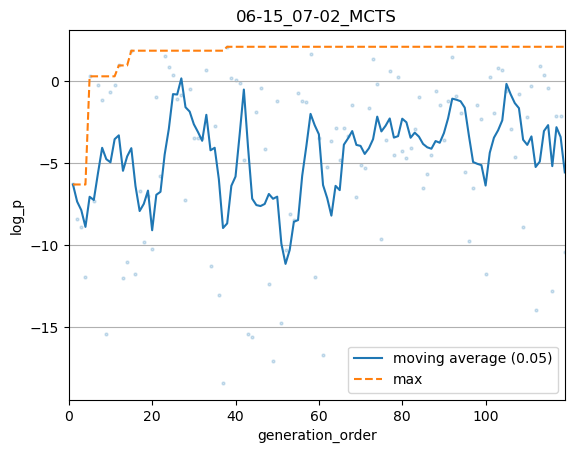

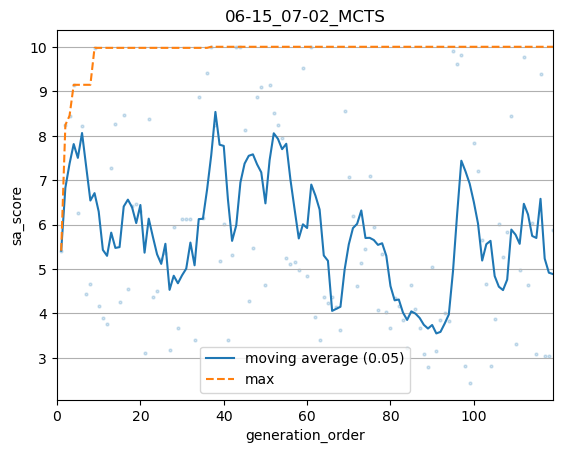

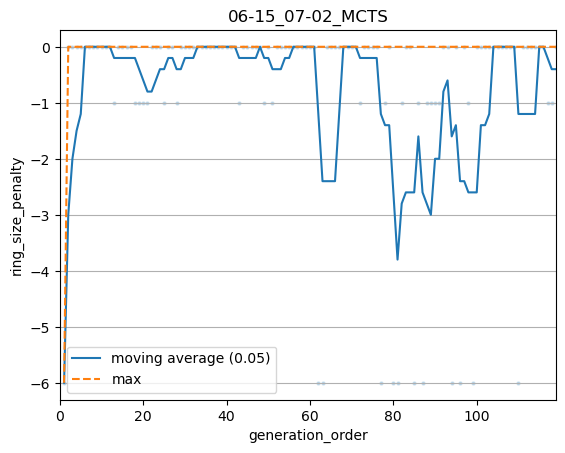

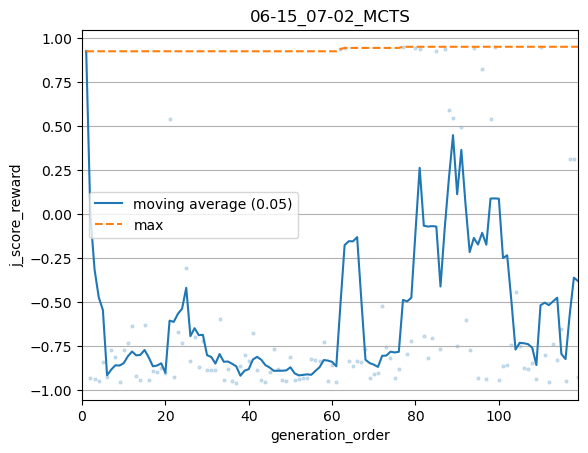

number of generated nodes: 119
valid rate: 0.7261904761904762
unique rate: 0.9821428571428571
node_per_sec: 10.916560979833626


In [26]:
#continue search
generator.generate(max_generations=10)
generator.plot(**conf.get("plot_conf", {}))
generator.analyze()

In [14]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [17]:
#load mcts test
load_path = generator.output_dir() + "save.mcts"
generator = MCTS.load(load_path, generator.transition) #TODO: separate notebook